In [1]:
#Dependents
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
#Our transaction Data
data = pd.read_csv("C:/Users/user pc/Downloads/Fraud Detection/transactions_train.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
#DATA Exploration and Preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [5]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
627        4
622        4
197        4
662        2
112        2
Name: step, Length: 699, dtype: int64

In [14]:
data.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [7]:
data.type.value_counts()

CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

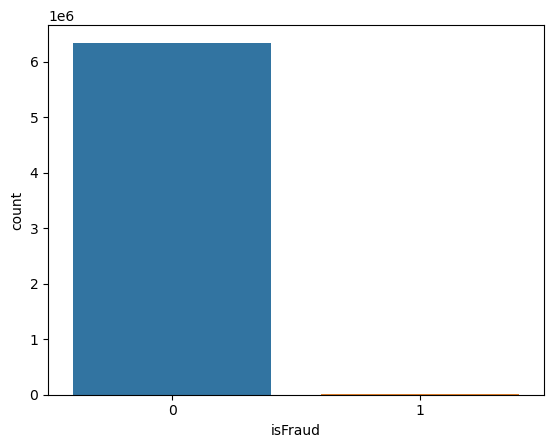

In [9]:
sns.countplot(x='isFraud',data=data)

In [10]:
data.isFraud.value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64

C:\Users\user pc\AppData\Local\Temp\ipykernel_37872\487219664.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['isFraud'].sort_values().plot(kind='bar')


<Axes: >

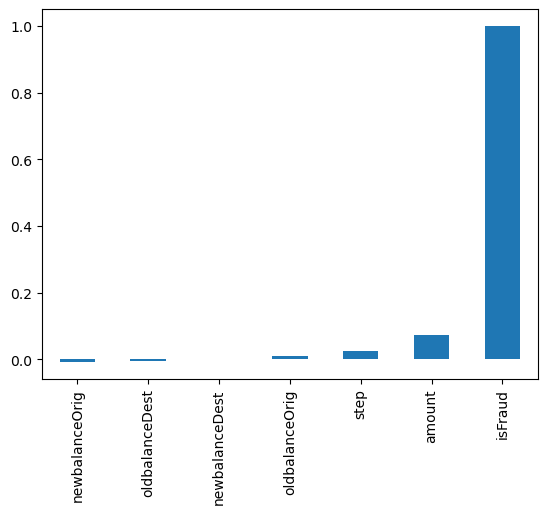

In [13]:
data.corr()['isFraud'].sort_values().plot(kind='bar')

In [17]:
data.replace({'type': {'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2,'TRANSFER': 3,'DEBIT': 4}},inplace=True)

In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [20]:
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [21]:
data.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,3,181.00,181.0,0.00,0.0,0.0,1
3,1,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [22]:
X = data.drop('isFraud',axis=1)
y = data['isFraud']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
print(X.shape, X_train.shape,X_test.shape)

(6351193, 7) (4255299, 7) (2095894, 7)


In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#our fraud prediction model
model = LogisticRegression()

In [27]:
#Model training 
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
#model prediction and evaluation 
fraud_prediction = model.predict(X_test)
print(f'Our fraud prediction has an accuracy of {accuracy_score(fraud_prediction,y_test) * 100:.2f}')

Our fraud prediction has an accuracy of 99.92


In [29]:
train_pred = model.predict(X_train)
print(f'Our fraud prediction has an accuracy of {accuracy_score(train_pred,y_train) * 100:.2f}')

Our fraud prediction has an accuracy of 99.92
